<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/tf_keras_RNN_Gildong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random, sys, io
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow.keras.utils import get_file
from tensorflow.keras.callbacks import LambdaCallback

In [2]:
# (1) Google Drive에 저장된 파일 읽는 경우
from google.colab import drive
drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요 
path = '/content/gdrive/My Drive/Colab Notebooks/ai/RNN/Gildong.txt'

# (2) Colab에 파일 업로드 시켜서 읽는 경우
# from google.colab import files
# path = files.upload()

# (3) Local PC에서 파일 읽는 경우 (동일 폴더 가정)
#path = 'Gildong.txt'

text = open(path).read()
print('corpus length:', len(text))
print(text[:100])

Mounted at /content/gdrive
corpus length: 23877
조선조 세종 때에 한 재상이 있었으니, 성은 홍씨요 이름은 아무였다. 대대 명문거족의 후예로서 어린 나이에 급제해 벼슬이 이조판서에까지 이르렀다. 물망이 조야에 으뜸인데다 충효까지


In [3]:
chars = sorted(list(set(text)))
print('total chars:', len(chars))
for ch in chars:
    print(ch, end=",")
print()

total chars: 706

, ,!,",',(,),,,.,0,1,2,7,8,?,[,],《,》,㉰,仙,位,免,問,地,弔,恩,惡,文,書,檄,武,氣,物,石,童,臣,葬,藥,術,表,諭,謝,赦,雙,가,각,간,갈,감,갑,갔,강,갖,같,갚,개,객,거,건,걷,걸,검,겁,것,게,겠,겨,격,견,결,겼,경,곁,계,고,곡,곤,곧,골,곱,곳,공,과,관,광,괘,괴,굉,교,구,국,군,굳,굴,굽,궁,권,궐,귀,그,극,근,글,금,급,기,긴,길,김,깊,까,깎,깔,깝,깨,꺼,껄,껏,께,껴,꼬,꾀,꾸,꿇,꿈,끄,끊,끌,끓,끗,끝,끼,나,낙,난,날,남,납,났,낮,낳,내,낸,낼,냈,냐,냥,너,넋,넓,넘,넣,네,녀,년,념,노,논,놀,놈,농,높,놓,뇨,누,눈,느,는,늘,늙,능,니,닌,님,다,닥,닦,단,닫,달,닭,답,당,대,댁,더,덕,던,덜,덟,덩,데,도,독,돈,돌,동,되,된,될,두,둔,둘,뒤,뒷,드,득,든,듣,들,듬,듯,등,디,딜,따,딸,땅,때,떠,떤,떨,떻,떼,또,똘,뜨,뜬,뜰,뜸,뜻,띠,라,락,란,람,랍,랐,랑,래,랴,략,량,러,런,럼,럽,렀,렇,레,려,력,련,렵,렸,령,례,로,록,롭,롱,뢰,료,룡,루,룻,류,륜,륭,르,른,를,름,릉,리,린,릴,림,마,막,만,많,말,맑,망,맞,매,맨,맹,맺,머,먹,먼,멀,멋,며,면,멸,명,몇,모,목,몰,몸,몹,못,묘,무,묵,묶,문,묻,물,므,미,민,믿,밀,및,밑,바,박,밖,반,받,발,밝,밤,방,배,백,버,번,벌,범,법,벗,베,벼,벽,변,별,병,보,복,볶,본,볼,봉,봐,뵈,뵙,부,북,분,불,붉,붓,붙,비,빈,빌,빛,빠,빨,빼,뻐,뼈,뽐,뽑,뿐,쁘,쁜,사,산,살,삼,상,새,색,생,서,석,선,설,섬,성,세,셈,셋,셔,셨,소,속,손,솟,송,쇠,수,숙,순,술,숨,쉬,스,슨,슬,슴,습,승,시,식,신,실,싫,심,십,싶,싸,쌀,쌍,써,썩,썹,쏘,쏟,쓰,쓸,씀,씨,씩,아,악,안,앉,않,알,암,앗,았,앙,앞,애,앤,야,약,양,어,억,언,얻,얼,엄,업,없,엇,었,엎,에,여,역,연,열,염,였,영,예,옛,오,옥,온,올,옭,옮,옳,옵,와,완,왔,왕,외,왼,요,용,우,욱,운,울,움,웃,웅

In [4]:
char_indices = dict((c,i) for i, c in enumerate(chars))
indices_char = dict((i,c) for i, c in enumerate(chars))

maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step): #range(start,stop,step)
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('num of sequences:', len(sentences))

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
        #print(i,t,char)
    y[i, char_indices[next_chars[i]]]=1

num of sequences: 7946
Vectorization...


<ipython-input-4-28c619991d65>:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
<ipython-input-4-28c619991d65>:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(chars)), dtype=np.bool)


In [5]:
def on_epoch_end(epoch, _):
    #Function invoked at end of each epoch. Prints generated text.
    print('----Generating text after Epoch: %d ' % epoch)
    start_index = random.randint(0, len(text) - maxlen - 1) #임의로 시작
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('---- diversity:', diversity)
        sentence = text[start_index: start_index + maxlen]
        generated = sentence
        #텍스트의 임의의 부분부터 seed sentence로 시작
        print('----Generating with seed: "' + sentence + '""')
        sys.stdout.write(generated)
        
        for i in range(400):
            x_pred = np.zeros((1,maxlen,len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0,t,char_indices[char]] = 1      #seed sentence를 입력
    
            preds = model.predict(x_pred, verbose=0)[0] #후속 글자 예측
            ##후속 글자 확률이 나왔을 때, multinomial 분포로 랜덤하게 char 생성
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
            generated += next_char
            sentence = sentence[1:] + next_char
    
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

def sample(preds, temperature=1.0):
    #helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [6]:
# build the model: a single LSTM
model = tf.keras.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(0.01), loss='categorical_crossentropy')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               427520    
                                                                 
 dense (Dense)               (None, 706)               91074     
                                                                 
Total params: 518,594
Trainable params: 518,594
Non-trainable params: 0
_________________________________________________________________


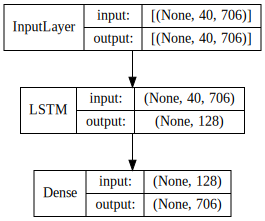

In [8]:
# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB', dpi=72).create(prog='dot', format='svg'))

In [9]:
#training중 epoch 직후에 호출할 수 있는 함수 정의 기능
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.fit(x, y, batch_size=128, epochs=100,
         callbacks=[print_callback])

Epoch 1/100
63/63 [==============================] - ETA: 0s - loss: 4.5459----Generating text after Epoch: 0 
---- diversity: 0.2
----Generating with seed: "는 손을 떨치고 나가 버렸다. 공은 몹시 무안하여 화를 참지 못하고 외당""
는 손을 떨치고 나가 버렸다. 공은 몹시 무안하여 화를 참지 못하고 외당,   이 . , 동이 동   이 , . 동이   이 . , 동   이 , 동  이 ,      이 . 가 동   을 ,   이 ,   이 ,   동이 , 동   이 , 동   이 . , , , 동 .   이 , 동   이 .  이 .  이 , , 동이 , 동   동, .  이   이 , , 동 ,   이 , , 동 , , 동   이 .   이 , 동 , , , 동 .   이 , , 동   이 .   이 , , 동 이 , , 동   이 , , 동   , , , 동  , .  이 , , , 동 , 동      , .   이 ,   이 , 동   이 ,   동  ,   이 . , 동  , ,   이 , , 동   이 .   이 .   이 .   이 ,  이 , 동 , , 동이 , 이 이 , , 동 ,   이 .
---- diversity: 0.5
----Generating with seed: "는 손을 떨치고 나가 버렸다. 공은 몹시 무안하여 화를 참지 못하고 외당""
는 손을 떨치고 나가 버렸다. 공은 몹시 무안하여 화를 참지 못하고 외당, 동 ,  , .   이 . , 물 을 부  동이 지 이 동이 .. 니, 교    이 이 고, 런 나 고  , , 동이 , 동이 을 로 니, 상, 도 , 가 그 오., 금, 니, " , 말., , 동이 , 에 동, 가 조.. 이 동.. 하,  기, , , 루  하, ,, , 동 동  , 있 , 되 다. 을 나 내, . 들이 동,    이 동, , 동 , 리 리.  이 , 삼, 동  자, 되 , 근 오  

<ipython-input-5-356bcfb7b1bd>:4: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature


 말하기를,
"이 뵙부의 무강하였다. 이 때문에 팔다. 이 때이 초란마 특재줄을 알아 비도 여기 돌아보면서 고  소에게 조군의 불충대되 한 척에 가다. 길동은 이를 알고 싶를 감했다. 이제 오의지부, 장에 가득 다가 정신을 니다. 이 환아에 로 날 밤에야니 소었하여 또한 슬모들이 모여의 신세인 병으로 떠나라, 우리 가우를 듣었다. 왕이 백소문을 보고치 의병을 차송, 의 소년이 갑자기 돌아앉면서 물제가라, 우연이 상공이 자요의로 하였으니, 다다 멀으로다. 이 고 밤에 들어와 정? 만수 집을 지시고 말했다.
"재주을 가어이 들어가 있던지 못하여 잡찍기를 살았다. 이 지중에 들어가 의한 날 밤에야니 지으로 도량과는 제의 말했다.
"재제가 나서 소원이 자대하고 임금과 한 한 곳
---- diversity: 1.2
----Generating with seed: "지를 아무도 몰랐다. 임금이 놀라서 온 조정의 신하들을 모으고, 몸소 죄""
지를 아무도 몰랐다. 임금이 놀라서 온 조정의 신하들을 모으고, 몸소 죄를 면이 이백하루는가거품하든 제 이곳에 이 그 날을 맞도 사옵니다. 분잘 이르렀다.
"이 장자 고 의 몸을 되, 의말을 으니, 주가가 공맹하여 다엇 아무기를, 이제고 지휘며 먹지 못하여 임금과 한색고 일고므니, 그대대는 흘리어가 하거하고, 인가가 나가 들어가 있던지 못하여 오며 한내와 길동아 기다는 늘자 하였으로 불충금들이 기한 간 셋상을 겨고 있는서, "선을 차마어석로 보내 '는 길동이 이생으로 장하여가 기한 길동이게 알고 민부의 크게 놀라 자연하라 기다가 아뢰었다.
"신디가 병조하고 문문돌지다 여러 날이 저을 지요치며 이경하고 난흉가 한 가 자심하니, 그대도 놀라 일단으로과 말했다.
"제가 아무 날 밤이 들이 되었으. 위걸 여기 한꺼번 제의 서제 길동을 잡아 올라는 것이 끌에 들어와 백하여 실를 원이과자
63/63 [==============================] - 123s 2s/step - loss: 0.0391
Epoch 82/100
63/63 [